# <h1 style= "text-align: center;">Programmatic Data Wrangling - TMDB</h1>

<h2 style= "text-align: center;">By Liam Dearlove</h2>

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [50]:
# Load the dataset into a dataframe
dataset = "TMDB_movies.csv"

df = pd.read_csv(dataset).reset_index()

In [51]:
# Checking number of rows and columns
df.shape

(4803, 21)

In [53]:
# Looking at the structure of the dataset
df.head(10)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
8,8,2

## Checking Each Entry Is Unique

In [54]:
# Check if all unique titles
unique_titles = df['title'].unique()

len(unique_titles)

4800

In [55]:
unique = set(unique_titles)

strip = set()

for name in unique:
    strip.add(name.lower().strip())

len(strip)

4800

In [56]:
title_duplicates = df[df.duplicated('title')]
title_duplicates

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2877,2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,...,"[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537
3693,3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,...,"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [57]:
id_duplicates = df[df.duplicated('id')]
id_duplicates

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


Length of unique titles and stripped titles is the same therefore there are no titles with whitespace errors.

However, the number of unique titles does not match the number of rows. When investigated, I realised there are 3 movies with the same name, but they are not the same movie. When I check by id, there are no duplicates.

## Films and Revenue

In [58]:
# Create a new dataframe with only the budget and revenue
new_df = df[['budget', 'revenue']].copy()

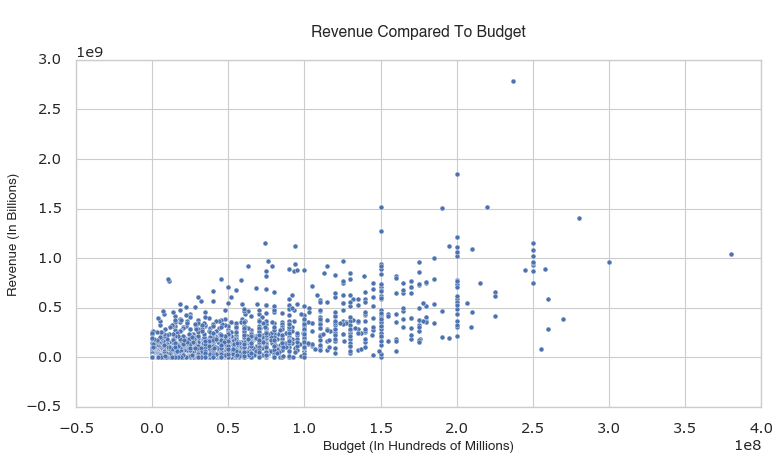

In [245]:
# Use the new dataframe to compare revenue and budget using a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', 
                y='revenue', 
                data=new_df,
               )
#sns.set(font_scale=1.2, style='whitegrid', font='Verdana')
plt.xlabel('Budget (In Hundreds of Millions)', fontdict={'family': 'Helvetica', 'size': 12})
plt.ylabel('Revenue (In Billions)', fontdict={'family': 'Helvetica', 'size': 12})
plt.title('\nRevenue Compared To Budget\n', fontdict={'family': 'Helvetica', 'size': 14})
plt.tight_layout()
plt.show()

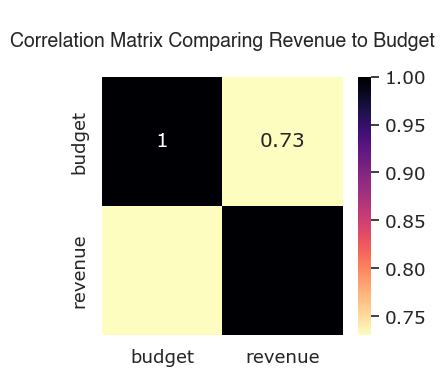

In [101]:
# Create a correlation matrix to visual the potential correlation between revenue and budget
numeric_df = new_df.select_dtypes(include=np.number)

plt.figure(figsize = (4,4))

sns.heatmap(numeric_df.corr(),
            annot = True,
            cmap = 'magma_r',
           )

plt.title("\nCorrelation Matrix Comparing Revenue to Budget\n", fontdict={'family': 'Helvetica', 'size': 14})
plt.tight_layout()
plt.show()

From the scatter graph and correlation matrix, we can conclude that there is not a strong positive correlation between revenue and budget.

## Revenue And Genre

In [61]:
def extract_genres(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    ''' Return the Genres'''
    return Genres

## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

In [150]:
# Expand the dataset out so that there is a single row for each genre
df_genres = df.explode('extracted_genres')

In [82]:
# Create a new dataframe that groups the genres and totals the amount of revenue for each genre and sorts by highest revenue desc
revenue_by_genre = df_genres.groupby('extracted_genres')['revenue'].sum().sort_values(ascending=False).copy()

extracted_genres
Adventure          164841561551
Action             162959914515
Comedy             122760517608
Drama              119710983984
Thriller           103250426269
Family              83283238689
Fantasy             81982199925
Science Fiction     81564235745
Romance             53642137545
Animation           52812167865
Crime               46040860686
Mystery             27248722761
Horror              22599894663
War                 12118445911
History             11332141732
Music                8964351078
Western              3792169111
Documentary          1082277678
Foreign                12398151
TV Movie                      0
Name: revenue, dtype: int64

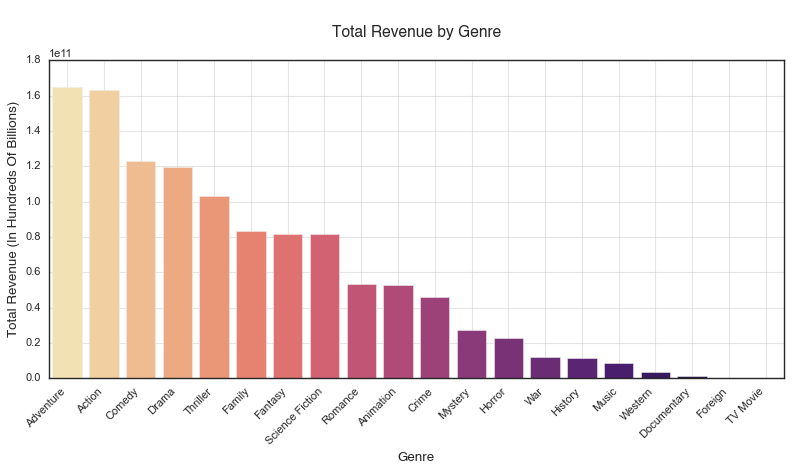

In [230]:
# Create a bar chart to show the total revenue by genre
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_genre.index,
            y=revenue_by_genre.values,
            palette='magma_r'
           )
plt.xlabel('Genre', fontdict={'family': 'Helvetica', 'size': 12})
plt.ylabel('Total Revenue (In Hundreds Of Billions)', fontdict={'family': 'Helvetica', 'size': 12})
plt.title('\nTotal Revenue by Genre\n', fontdict={'family': 'Helvetica', 'size': 14})
plt.xticks(rotation=45,
            horizontalalignment = 'right',
            fontweight = 'light',
            fontsize =  'medium')
plt.grid(axis='x', linestyle='-', alpha=0.5)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

## Revenue To Budget

In [235]:
# Create new column that shows the revenue to budget ratio for each film
df['revenue_to_budget_ratio'] =  np.where(df['budget'] != 0, df['revenue'] / df['budget'], np.nan)
ratio_df = df.copy()
# Create a new dataframe with the top 10 films with the best revenue to budget ratios
top_films = ratio_df.nlargest(10, 'revenue_to_budget_ratio')

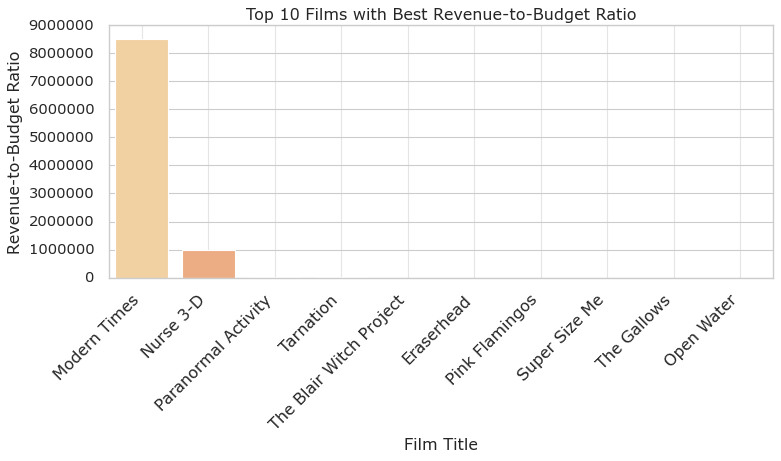

In [238]:
# Graph to show the top 10 films with the best revenue to budget ratios
plt.figure(figsize=(10, 6))
sns.barplot(data=top_films, x='title',
            y='revenue_to_budget_ratio',
            palette='magma_r'
           )
plt.xlabel('Film Title')
plt.ylabel('Revenue-to-Budget Ratio')
plt.title('Top 10 Films with Best Revenue-to-Budget Ratio')
plt.xticks(rotation=45,
            horizontalalignment = 'right',
            fontweight = 'light',
            fontsize =  'medium')
plt.grid(axis='x', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

2 film should be removed (Modern Times and Nurse 3-D) due to errors in their budget- 1 and 10 respectively.

In [198]:
# Removes the 2 films with errors in their budgets
rows = ['Modern Times', 'Nurse 3-D']
top_films_fixed = ratio_df[~ratio_df['title'].isin(rows)]

In [199]:
# Create a new frame that contains the new 10 films with the best revenue to budget ratios
new_top_10 = top_films_fixed.nlargest(10, 'revenue_to_budget_ratio')

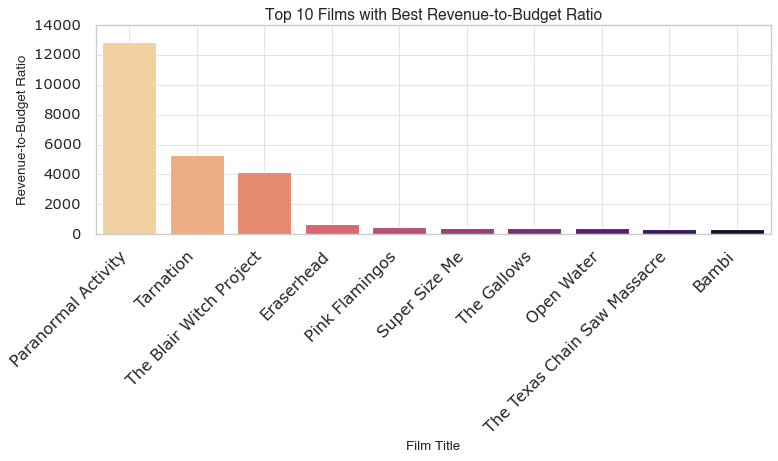

In [239]:
# Graph to show the new top 10 films with the best revenue to budget ratios
plt.figure(figsize=(10, 6))
sns.barplot(data=new_top_10, x='title',
            y='revenue_to_budget_ratio',
            palette='magma_r'
           )
plt.xlabel('Film Title', fontdict={'family': 'Helvetica', 'size': 12})
plt.ylabel('Revenue-to-Budget Ratio', fontdict={'family': 'Helvetica', 'size': 12})
plt.title('Top 10 Films with Best Revenue-to-Budget Ratio', fontdict={'family': 'Helvetica', 'size': 14})
plt.xticks(rotation=45,
            horizontalalignment = 'right',
            fontweight = 'light',
            fontsize =  'medium')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.grid(axis='x', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

In [149]:
# Separate genres in the dataframe with the 10 best revenue to budget ratios
new_top_10['extracted_genres'] = new_top_10['genres'].apply(extract_genres)
genre_10 = new_top_10.explode('extracted_genres')
genre_10 = genre_10['extracted_genres'].value_counts()

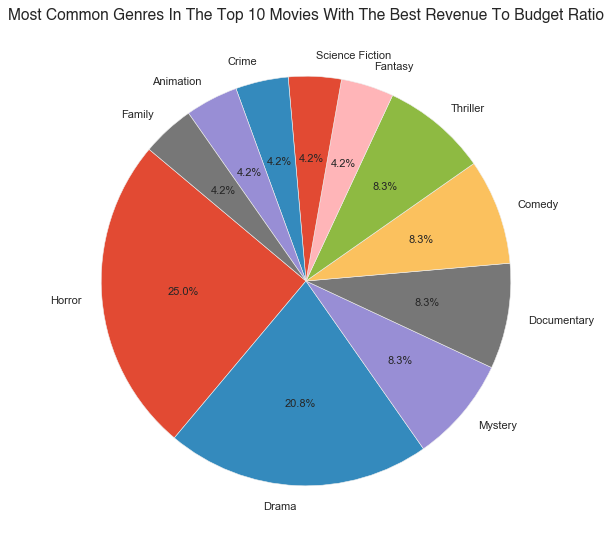

In [222]:
# Creates pie chart to show the most common genres in the films with the best revenue to budget ratios
plt.figure(figsize=(10, 8))
plt.pie(genre_10.values,
        labels=genre_10.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title("Most Common Genres In The Top 10 Movies With The Best Revenue To Budget Ratio", fontdict={'family': 'Helvetica', 'size': 14} )
plt.style.use('seaborn-v0_8-white')
plt.show()

From this, it can be seen that movies with the best revenue to budget ratios have horror among their genres.

In [124]:
# Shows the dataset entry for Paranormal Activity
ratio_df[(ratio_df['title'] == 'Paranormal Activity')]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,revenue_to_budget_ratio
4577,4577,15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.paranormalactivity-movie.com/,23827,"[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...",en,Paranormal Activity,"After a young, middle class couple moves into ...",47.456823,...,193355800,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What Happens When You Sleep?,Paranormal Activity,5.9,1316,"[Horror, Mystery]",12890.386667


In [151]:
# Shows the dataset entry for Paranormal Activity 2
ratio_df[(ratio_df['title'] == 'Paranormal Activity 2')]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,revenue_to_budget_ratio
3889,3889,3000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://www.paranormalmovie.com/trailer/,41436,"[{""id"": 10112, ""name"": ""ouija board""}, {""id"": ...",en,Paranormal Activity 2,Just as Dan and Kristi welcome a newborn baby ...,22.789649,...,177512032,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,In 2009 you demanded it. Nothing can prepare y...,Paranormal Activity 2,5.7,722,"[Horror, Thriller]",59.170677


Comparing the first 2 Paranormal Activity movies, we can see the a major drop off in revenue to budget ratio. The movie saw a large increase in budget (presumably due to the first movie's success) but made less money.
It further shows that budget does not correlate with revenue and also potentially suggest that when movies with low budgets do well, it is difficult to recreate that success with the same franchise. 

In [167]:
# Creates a dataframe with only the info for the Paranormal Activity movies
filtered_df = ratio_df[ratio_df['title'].str.startswith('Paranormal Activity')].copy()
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])
filtered_df_sorted = filtered_df.sort_values('release_date')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


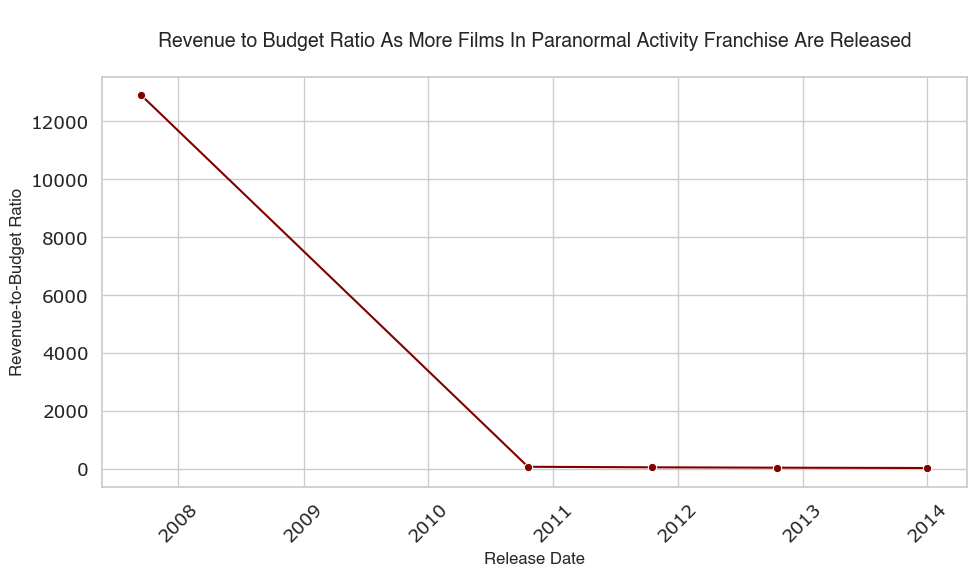

In [197]:
# Creates a graph to show how revenue to budget ratio changes as new films in the franchise are released
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df_sorted,
             x='release_date',
             y='revenue_to_budget_ratio',
             marker='o',
             color='maroon')
plt.xlabel('Release Date', fontdict={'family': 'Helvetica', 'size': 12})
plt.ylabel('Revenue-to-Budget Ratio', fontdict={'family': 'Helvetica', 'size': 12})
plt.title('\nRevenue to Budget Ratio As More Films In Paranormal Activity Franchise Are Released\n', fontdict={'family': 'Helvetica', 'size': 14})
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Looking further into the franchise, we can see the revenue to budget ratio continues to go down. The revenue for the 3rd movie was greater than the first movie but since the budget was much higher the ratio still went down. The 4th movie then saw the same budget for the 3rd but made the least money out of all the movies

In [155]:
# # Shows the dataset entry for The Blair Withc Project
ratio_df[(ratio_df['title'] == 'The Blair Witch Project')]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,revenue_to_budget_ratio
4496,4496,60000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.blairwitch.com/,2667,"[{""id"": 616, ""name"": ""witch""}, {""id"": 3392, ""n...",en,The Blair Witch Project,In October of 1994 three student filmmakers di...,41.690578,...,248000000,81.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The scariest movie of all time is a true story.,The Blair Witch Project,6.3,1055,"[Horror, Mystery]",4133.333333


In [156]:
# # Shows the dataset entry for Book of Shadows: Blair Witch 2ß
ratio_df[(ratio_df['title'] == 'Book of Shadows: Blair Witch 2')]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,revenue_to_budget_ratio
2567,2567,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 53, ""...",NaN,11531,"[{""id"": 616, ""name"": ""witch""}, {""id"": 4697, ""n...",en,Book of Shadows: Blair Witch 2,Young adults become fascinated by the events o...,3.890223,...,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Evil Doesn't Die.,Book of Shadows: Blair Witch 2,4.3,212,"[Mystery, Thriller, Horror]",NaN


To look further at the idea of low budget movies making a lot of money but struggling to recreate the success, I tried to look at The Blair Witch Project and its sequel, considering it is also part of the top 10 movies with revenue to budget ratio. However, the revenue and budget for the movie are 0, suggesting that the data is missing. Some small research shows that the movie had a budget of 15 million.

In [185]:
# Creates a random sample of 5 films with 0 budget
unlikely_df = df[(df['budget'] == 0)].copy()
random_titles = unlikely_df['title'].sample(n=5)
print(random_titles)

1626    My Super Ex-Girlfriend
3620             Grandma's Boy
4802         My Date with Drew
3947       Damsels in Distress
4565             Bloody Sunday
Name: title, dtype: object


Seeing that there is a film with 0 budget when it should not be, I took a random sample of movies when their budget was 0 and found other movies with 0 budget when they should have an actual budget e.g. My Super Ex-Girlfriend had a budget of 30 million according to Wikipedia (take with a grain of salt).